# For the following exercises, you'll need to load several datasets using the pydataset library. (If you get an error when trying to run the import below, use pip to install the pydataset package.)

- from pydataset import data

When the instructions say to load a dataset, you can pass the name of the dataset as a string to the data function to load the dataset. You can also view the documentation for the data set by passing the show_doc keyword argument.

mpg = data('mpg') 
- #load the dataset and store it in a variable
- #data('mpg', show_doc=True) 
- #view the documentation for the dataset

In [1]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [2]:
#creates a variable holding the mpg dataframe
mpg_df = data('mpg')

#to read the documentation of mpg
data('mpg', show_doc = True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




### On average, which manufacturer has the best miles per gallon?

In [7]:
#creates a new column of the average of the city and highway mpg
mpg_df['overall_mpg'] = (mpg_df.cty + mpg_df.hwy) / 2

#creates a new df for the values grouped by the manufacturer with average values
#displaying 1 shows us the highest overall mpg by manufacturer
average = mpg_df.groupby('manufacturer').mean()
average = average.sort_values(by='overall_mpg', ascending = False)
average.head(1)

,displ,year,cyl,cty,hwy,overall_mpg
manufacturer,,,,,,
honda,1.711111,2003.0,4.0,24.444444,32.555556,28.5


### How many different manufacturers are there?

In [8]:
#value counts finds the count of each unique value
#using count at the end, sums the unique manufactures
count = mpg_df.manufacturer.value_counts().count()

#displaying the variable in a human-readable format
print('There are',count,'different maufactures in mpg.')

There are 15 different maufactures in mpg.


### How many different models are there?

In [9]:
#value counts finds the count of each unique value
#using count at the end, sums the unique models
count = mpg_df.model.value_counts().count()

#displaying the variable in a human-readable format
print('There are',count,'different models in mpg.')

There are 38 different models in mpg.


### Do automatic or manual cars have better miles per gallon?

In [13]:
#creates a new df of only the automatic cars
auto = mpg_df[mpg_df.trans.str.contains('auto')]

#creates a new data frame of only the manual cars
manual = mpg_df[mpg_df.trans.str.contains('manual')]

#displays the average overall mpg of all automatic cars
print('The overall mpg of automatic cars is: ',auto.overall_mpg.mean())

#displays the average overall mpg of all manual cars
print('The overall mpg of manual cars is: ',manual.overall_mpg.mean())

#prints the higher mpg depending on values
if auto.overall_mpg.mean() > manual.overall_mpg.mean():
    print('\nAutomatic cars have better overall mileage than manual cars.')
elif manual.overall_mpg.mean() > auto.overall_mpg.mean():
    print('\nManual cars have better overall mileage than automatic cars.')

The overall mpg of automatic cars is:  19.130573248407643
The overall mpg of manual cars is:  22.227272727272727

Manual cars have better overall mileage than automatic cars.


# 2. Joining and Merging

### Copy the users and roles dataframes from the examples above.

In [344]:
#creates users data frame
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

#creates roles data frame
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

### A left join

In [345]:
#displaying a left join of users and roles
pd.merge(users, roles, left_on='role_id', right_on='id', how='left')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


### What do you think a right join would look like?

- We are considering the roles table as the right join. For a right join, it takes everything from the right table, and everything shared between the two tables. What is not shared in the left table with the right table is not included. So the values that are not defined in the left table are shown as NaN.
- "Returns all records from the right table (table2), and the matched records from the left table (table1). The result is NULL from the left side, when there is no match."
- https://www.w3schools.com/sql/sql_join_right.asp

In [346]:
#a right join of users and roles
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


### An outer join? 

In an outer join, unmatched rows in one or both tables can be returned.

In [347]:
#an outer join of users and roles
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


### What happens if you drop the foreign keys from the dataframes and try to merge them?

In [348]:
#creating the tables without the shared key
#a join can not happen without these
#creates users data frame without foreign key
users2 = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
})

#creates roles data frame without foreign key
roles2 = pd.DataFrame({
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

pd.merge(users2, roles2, left_on='role_id', right_on='id', how='left')

KeyError: 'id'

# 3. Getting data from SQL databases

### Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [3]:
#defines function to create a sql url using personal credentials
def get_db_url(db_name):
    
    #importing variables used to connect to sql database
    from env import host, username, password
    
    #creates the url and the function returns it
    url = f'mysql+pymysql://{username}:{password}@{host}/{db_name}'
    return (url)

### Use your function to obtain a connection to the employees database.

In [5]:
#panda can read sql querries
#use read_sql function, querry you want to run, and the connection url
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', get_db_url('employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


### Once you have successfully run a query:

### Intentionally make a typo in the database url. What kind of error message do you see?

In [ ]:
#creating a url with type
get_db_url_typo = f'mysql+pymysql://{username}123:{password}@{host}/employees'

#attempting to read_sql with typo
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', get_db_url_typo)

Error message was...
OperationalError: (1045, "Access denied for user...

### Intentionally make an error in your SQL query. What does the error message look like?

In [ ]:
#typo made in the '', the querry
pd.read_sql('SELECT * FRO employees LIMIT 5 OFFSET 50', get_db_url)

- when table spelled wrong: ProgrammingError: (1146, "Table 'employees.employee' doesn't exist")
- when syntax spelled wrong: ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'FRO employees LIMIT 5 OFFSET 50' at line 1")

### Read the employees and titles tables into two separate dataframes

In [6]:
#selecting all from employees table and saving it in the variable
employees = pd.read_sql('SELECT * FROM employees', get_db_url('employees'))

#selecting all from the titles table and saving it in the variable
titles = pd.read_sql('SELECT * FROM titles', get_db_url('employees'))

### Visualize the number of employees with each title.

Text(0, 0.5, 'Title')

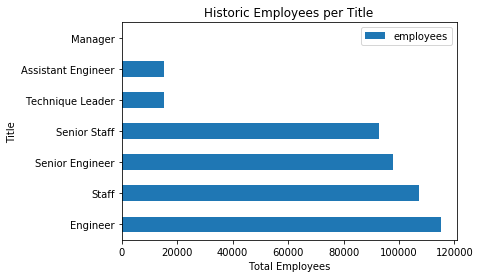

In [7]:
#using historical data, we did not filter out the old title dates or employees from above
#we joined the tables with a left join using the emp_no
emp_with_titles = pd.merge(employees, titles, left_on='emp_no', right_on='emp_no', how='left')

#value counts shows us the counts of the distinct title names
title_counts = emp_with_titles.title.value_counts()

#saving the variable as a dataframe instead of a series and renaming the column
title_counts = pd.DataFrame(title_counts)
title_counts = title_counts.rename(columns = {'title':'employees'})

#graphing the dataframe into a horizontal bar graph
title_counts.plot.barh()

#explicitly labeling the title and axis labels
plt.title('Historic Employees per Title')
plt.xlabel('Total Employees')
plt.ylabel('Title')

Text(0, 0.5, 'Title')

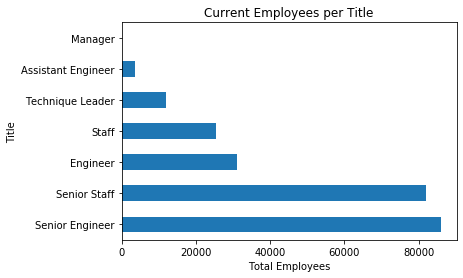

In [8]:
#this time we create a titles and employees data table with only the current data
titles_current = pd.read_sql('SELECT * FROM titles WHERE to_date > CURDATE()', get_db_url('employees'))
employees_current = pd.read_sql('''SELECT * FROM dept_emp WHERE to_date > CURDATE()''',get_db_url('employees'))

#we join the two together with the emp_no
emp_with_titles_current = pd.merge(employees_current, titles_current, left_on='emp_no', right_on='emp_no', how='left')

#value counts shows us the counts of the distinct title names
title_counts = emp_with_titles_current.title.value_counts()

#graphing the dataframe into a horizontal bar graph
title_counts.plot.barh()

#explicitly labeling the title and axis labels
plt.title('Current Employees per Title')
plt.xlabel('Total Employees')
plt.ylabel('Title')

### Join the employees and titles dataframes together. Visualize how frequently employees change titles.

In [9]:
#we joined the two historic tables together as emp_with_titles
#this variables holds the total count of employees for each title, whether the same employee or not
changes = emp_with_titles.emp_no.value_counts().sum()

#this variable holds the count of all employees without repeates due to change of titles
emp_total = emp_with_titles.emp_no.value_counts().count()

#we calculate the rate of change by dividing the two, and then print in a human_readableformat
title_rate = changes / emp_total
print('Employees change titles at a rate of', format(str(title_rate)), 'per employee.')

Employees change titles at a rate of 1.4775751273231474 per employee.


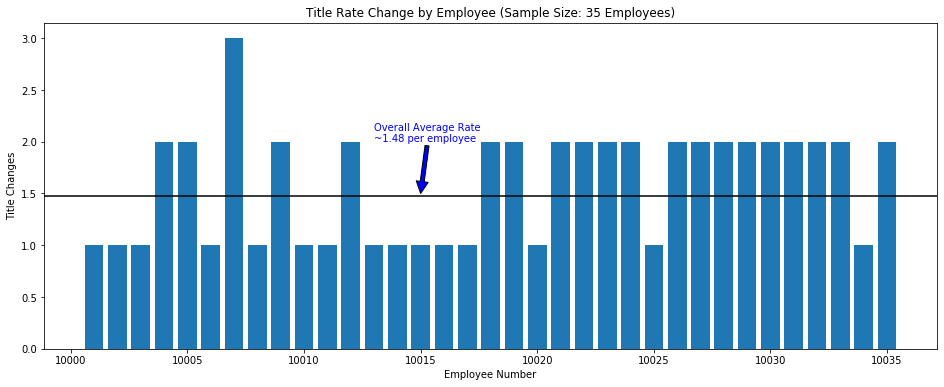

In [16]:
#checking data in database
emp_with_titles.head()

#grouping by emp_no and counting the titles for each as the y variable
y = emp_with_titles.groupby('emp_no')['title'].count().head(50)

#taking the first 50 rows in the dataframe
#(not necessarily 50, because some employees have more than one row if changed titles)
x = emp_with_titles.emp_no.head(50)

#setting figure size so easier to see
plt.figure(figsize=(16,6))

#plotting line for average title rate change
plt.axhline(y=title_rate, color="black")

#plotting x and y variables
plt.bar(x, y)

#setting title, axis labels, and annotation for average title rate
plt.title('Title Rate Change by Employee (Sample Size: 35 Employees)')
plt.ylabel('Title Changes')
plt.xlabel('Employee Number')
plt.annotate('Overall Average Rate\n~1.48 per employee', xy=(10015, 1.5), xytext=(10013,2), color='blue', arrowprops={'facecolor': 'blue'})

plt.show()

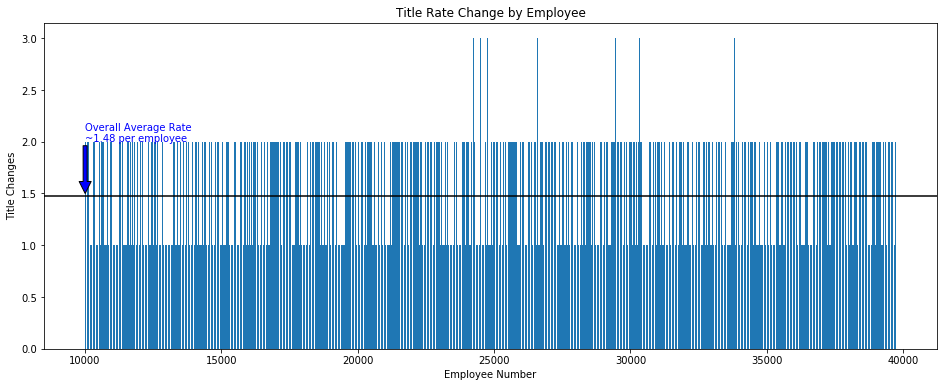

In [330]:
#copied same code as above to change amount of rows we plot without messing up the original code
emp_with_titles.head()
y = emp_with_titles.groupby('emp_no')['title'].count().head(44000)
x = emp_with_titles.emp_no.head(44000)

#we change the amount of rows by changing head() amount in parenthesis

x1 = title_rate
y1 = 0

plt.figure(figsize=(16,6))
plt.axhline(y=title_rate, color="black")
plt.bar(x, y)
plt.title('Title Rate Change by Employee')
plt.ylabel('Title Changes')
plt.xlabel('Employee Number')
plt.annotate('Overall Average Rate\n~1.48 per employee', xy=(10015, 1.5), xytext=(10013,2), color='blue', arrowprops={'facecolor': 'blue'})

plt.show()

### For each title, find the hire date of the employee that was hired most recently with that title.

In [56]:
#grouping by title, taking the max of title by hire_date
emp_with_titles.groupby('title')['hire_date'].max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

### Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [172]:
#current titles
cur_titles = pd.read_sql('''SELECT * FROM titles WHERE to_date > CURDATE()''', get_db_url('employees'))
#current employee departments
cur_dept_emp = pd.read_sql('''SELECT * FROM dept_emp WHERE to_date > CURDATE()''', get_db_url('employees'))
#department names
dept_names = pd.read_sql('''SELECT * FROM departments''', get_db_url('employees'))
#current department employees with titles
dept_emp_title = pd.merge(cur_titles, cur_dept_emp, left_on='emp_no', right_on='emp_no', how='left')
#current department employees with title and department name
dept_name_emp_title = pd.merge(dept_emp_title, dept_names, left_on='dept_no', right_on='dept_no')
#displaying final joined table
dept_name_emp_title.head()

,emp_no,title,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
0,10001,Senior Engineer,1986-06-26,9999-01-01,d005,1986-06-26,9999-01-01,Development
1,10006,Senior Engineer,1990-08-05,9999-01-01,d005,1990-08-05,9999-01-01,Development
2,10012,Senior Engineer,2000-12-18,9999-01-01,d005,1992-12-18,9999-01-01,Development
3,10014,Engineer,1993-12-29,9999-01-01,d005,1993-12-29,9999-01-01,Development
4,10022,Engineer,1999-09-03,9999-01-01,d005,1999-09-03,9999-01-01,Development


In [186]:
#creating a cross table by department name and title from same dataset
#adding a total column to the end rows and columns
titles_depts_xtab = pd.crosstab(dept_name_emp_title.dept_name, dept_name_emp_title.title, margins=True, margins_name="Total")

In [187]:
#displaying cross tab
titles_depts_xtab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,Total
dept_name,,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241,17569
Development,1652,14040,1,38816,1085,315,5477,61386
Finance,0,0,1,0,9545,2891,0,12437
Human Resources,0,0,1,0,9824,3073,0,12898
Marketing,0,0,1,0,11290,3551,0,14842
Production,1402,12081,1,33625,1123,349,4723,53304
Quality Management,389,3405,1,9458,0,0,1293,14546
Research,77,830,1,2250,9092,2870,321,15441
Sales,0,0,1,0,28797,8903,0,37701


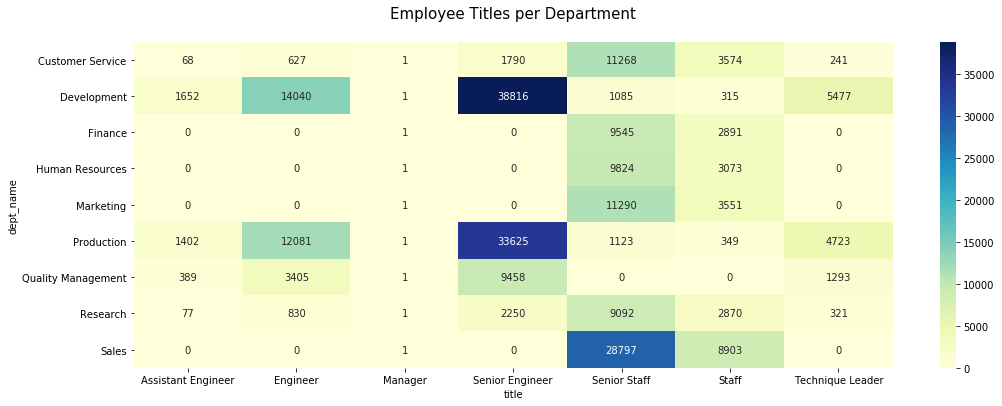

In [237]:
#importing seaborn to use the heat map function
import seaborn as sns

#setting the title and figure size
plt.figure(figsize=(17,6))
plt.title('Employee Titles per Department\n', fontsize = 15)

#creates a heatmap of the cross tab above
res = sns.heatmap(pd.crosstab(dept_name_emp_title.dept_name, dept_name_emp_title.title), cmap="YlGnBu", annot=True, cbar=True, fmt="d")

# 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [17]:
#setting the orders dataframe to the variable
orders = pd.read_sql('''SELECT * FROM orders''',get_db_url('chipotle'))
orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


### What is the total price for each order?

In [18]:
#must convert price to a float to be able to add the columns
orders['float_price'] = orders.item_price.str.replace('$','').astype(float)

In [19]:
#creating a new dataframe of orders grouped by order id, and adding total price
price_per_order = pd.DataFrame(orders.groupby('order_id')['float_price'].sum())

In [20]:
price_per_order

,float_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


### What are the most popular 3 items?

In [25]:
#finding the most popular items by quantity
item_quantity = pd.DataFrame(orders.groupby('item_name')['quantity'].sum())

#sort by highest quantity descending so we can do head(3) to see the top 3
item_quantity = item_quantity.sort_values(by='quantity', ascending=False)
item_quantity.head(3)

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


### Which item has produced the most revenue?

In [36]:
#creates a dataframe of each item and the revenue created
#revenue found by grouping by item name and then summing the float price
revenue = pd.DataFrame(orders.groupby('item_name')['float_price'].sum())

#sorting by highest revenue, then taking head of 3
revenue = revenue.sort_values(by='float_price', ascending=False)
revenue.head(3)

,float_price
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43
